# Исследование распределения продаж по годам и месяцам

Посмотрим, как распределены значения продаж в течение 1992-2024 гг. по годам и месяцам.\
Постороение данных графиков вынесено отдельно по причине их объема.

In [1]:
import pandas as pd

%matplotlib inline 

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Загрузим данные
data = pd.read_csv(
    './data/retail_trade_and_food_services.csv',
    parse_dates=['per_name'],
    index_col='per_name',
)

data.head()

,val
per_name,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0


Построим графики продаж отдельно для каждого года.

Сумма продаж в сфере розничной торговли и услуг общественного питания в США по годам


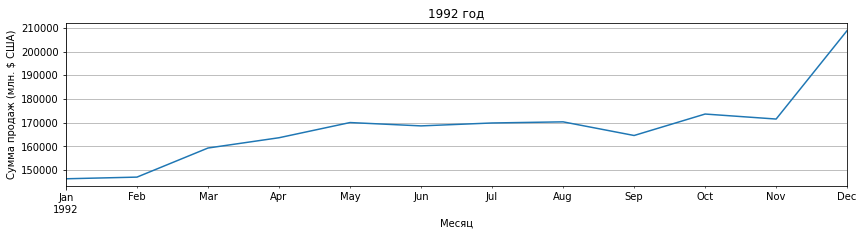

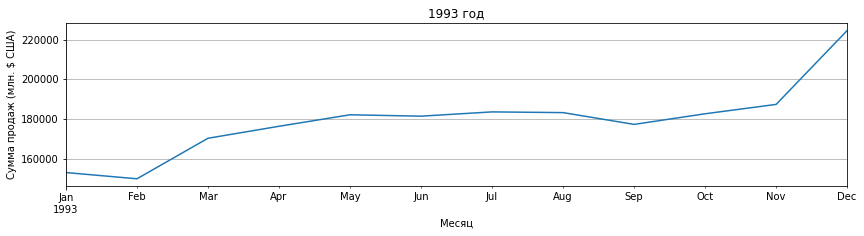

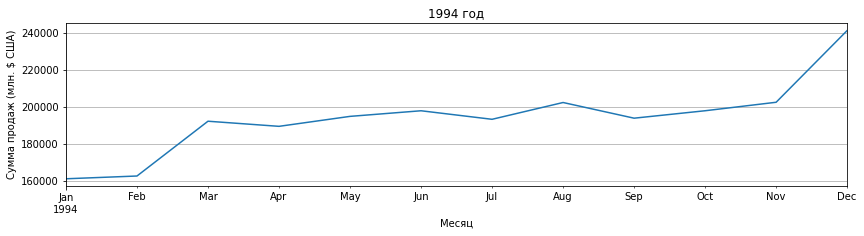

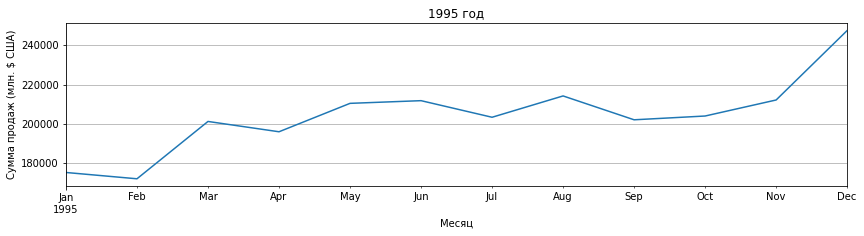

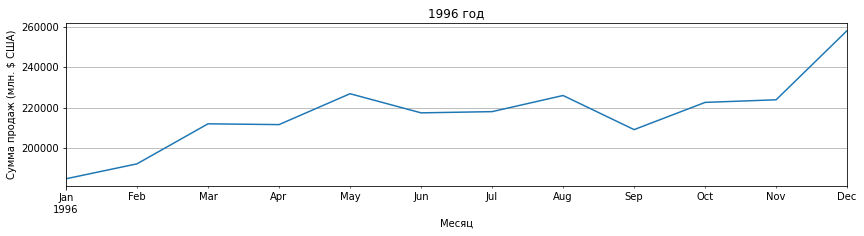

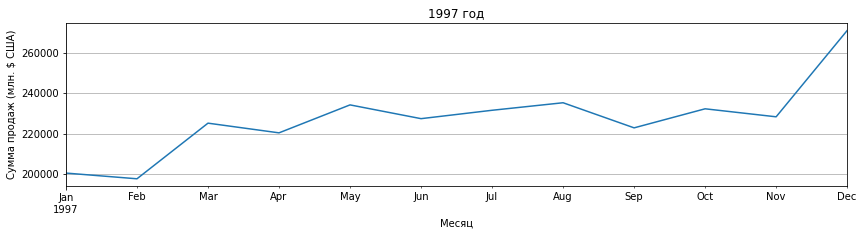

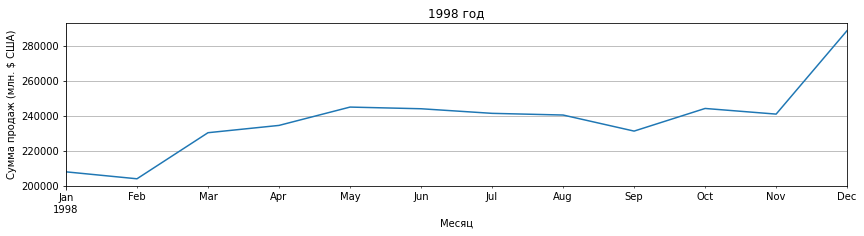

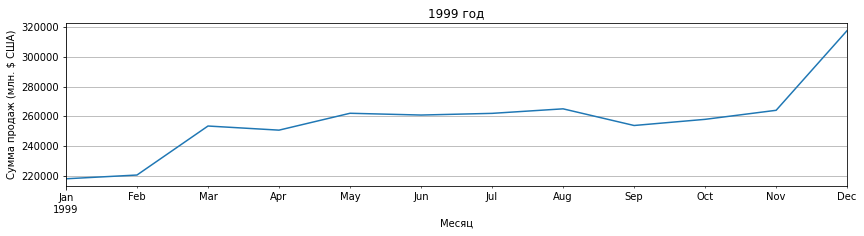

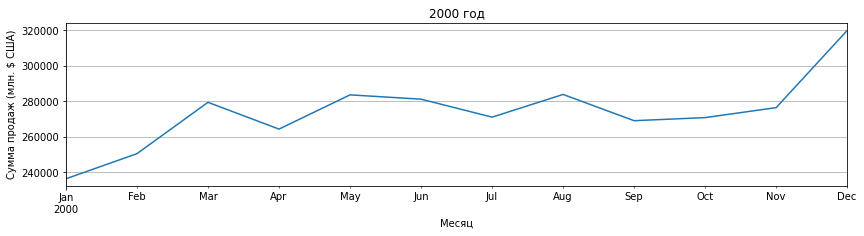

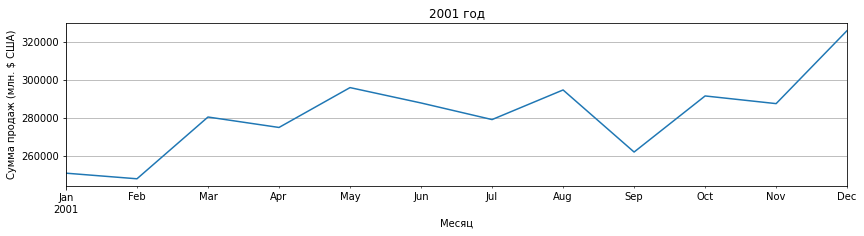

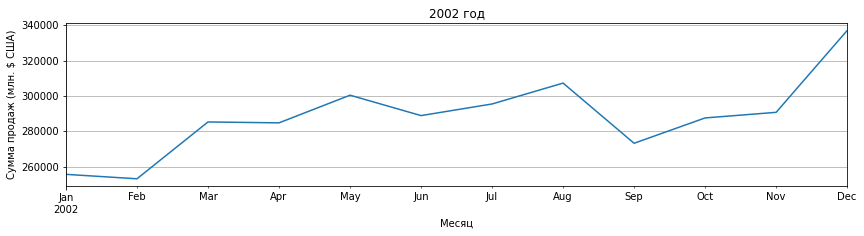

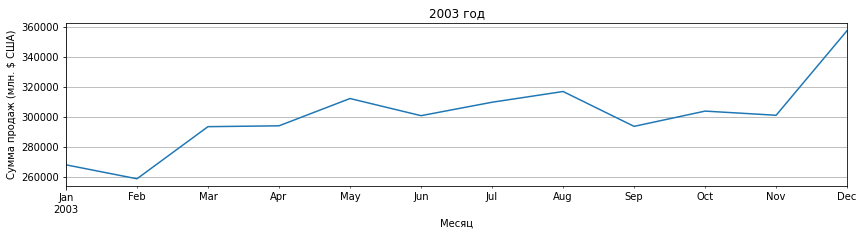

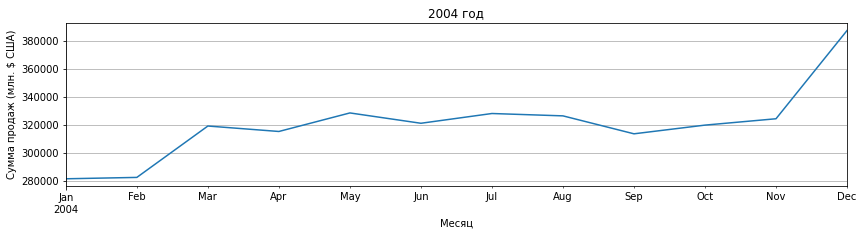

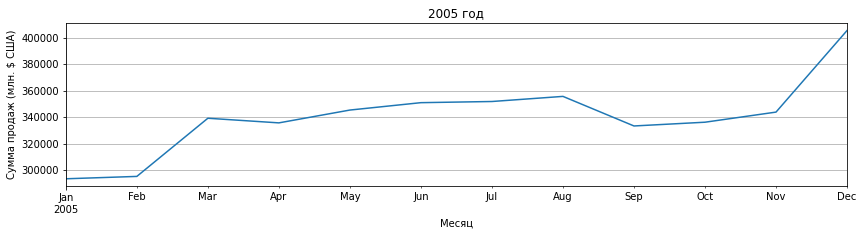

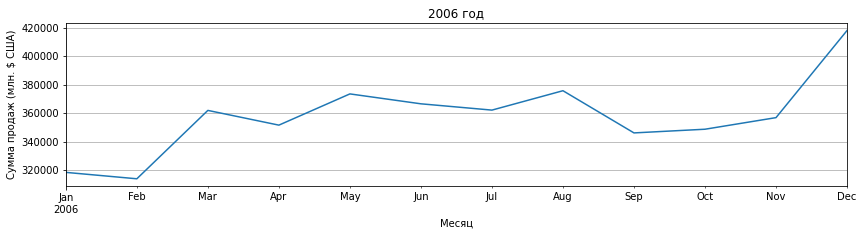

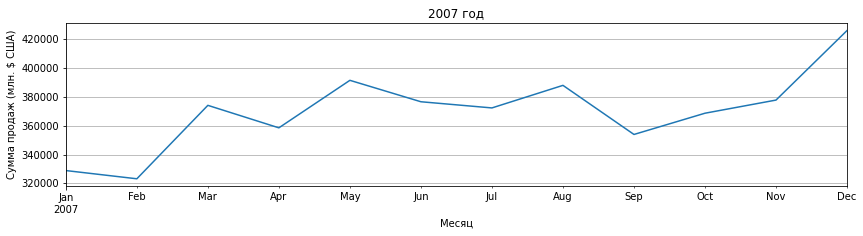

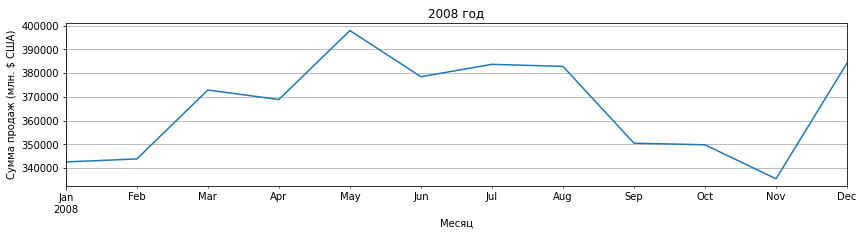

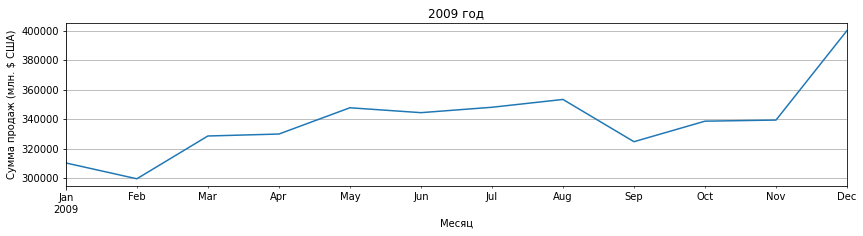

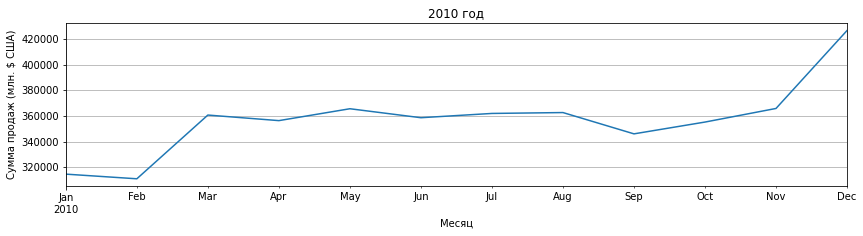

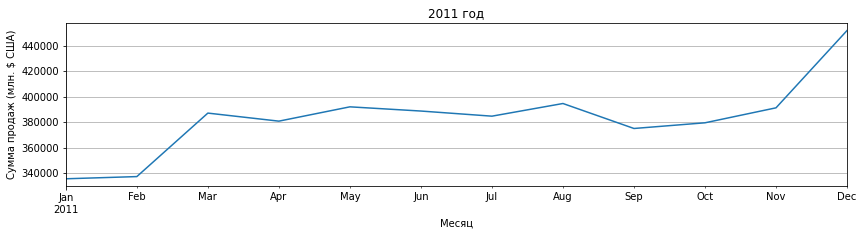

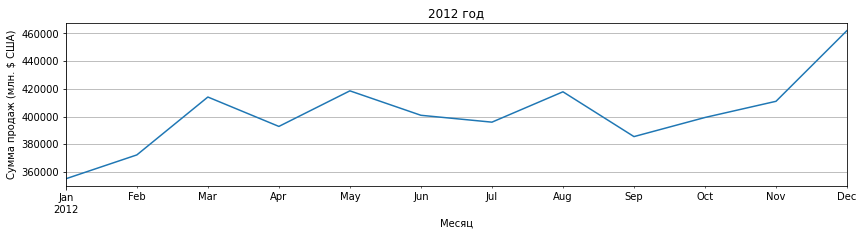

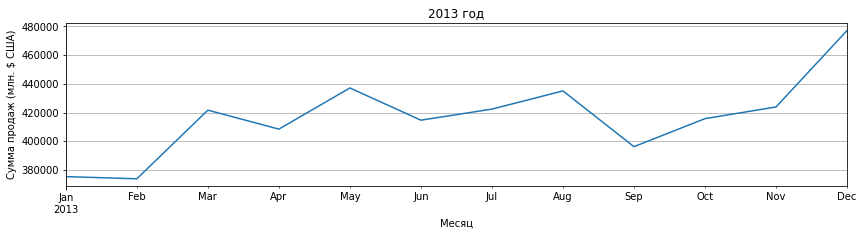

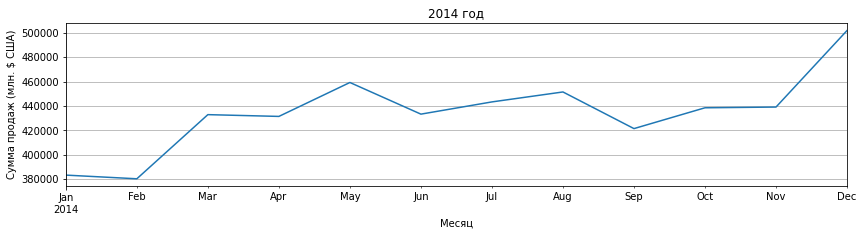

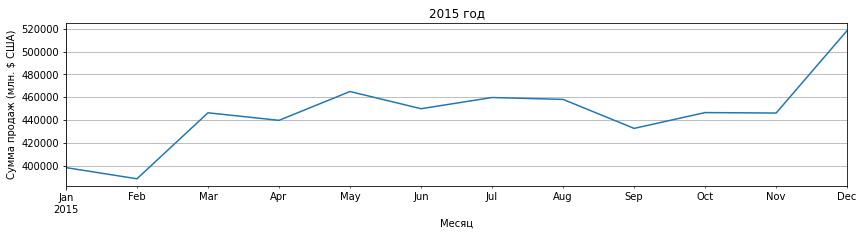

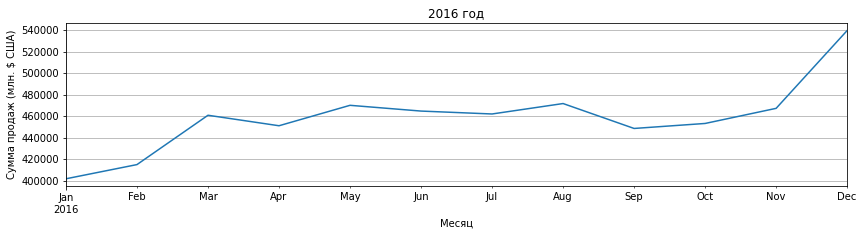

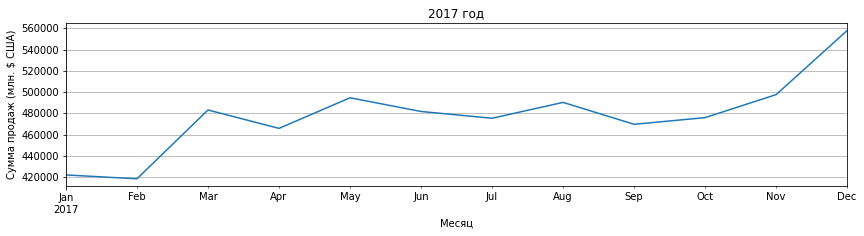

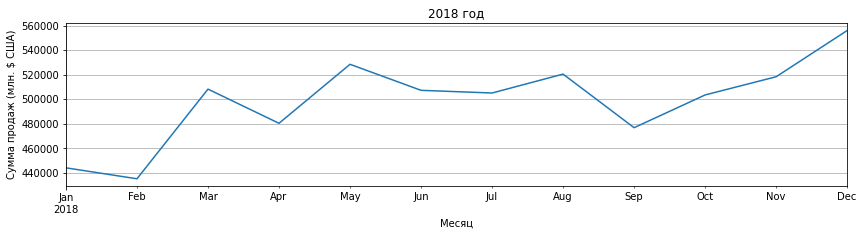

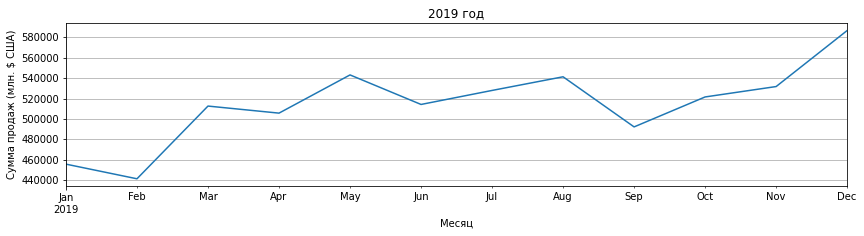

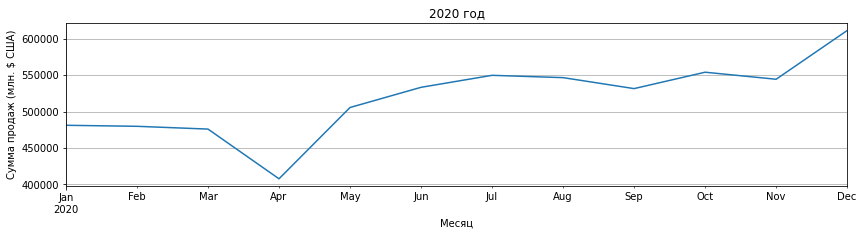

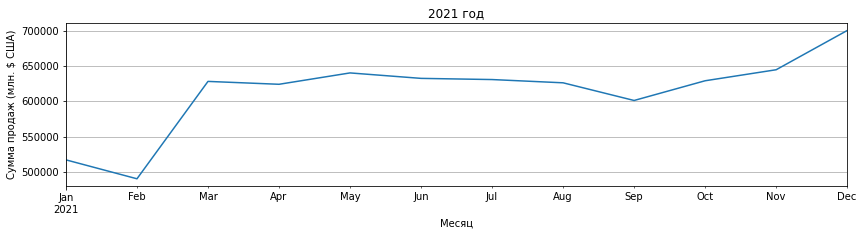

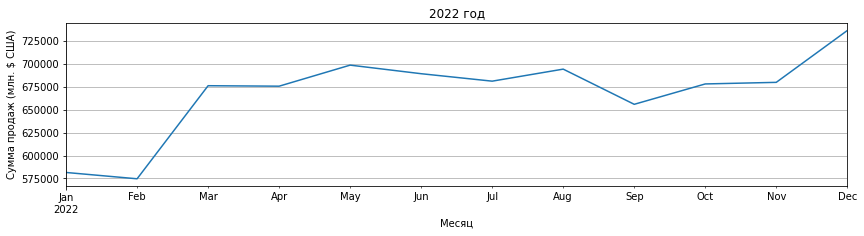

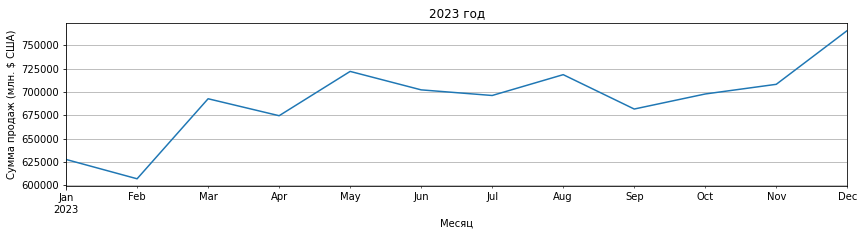

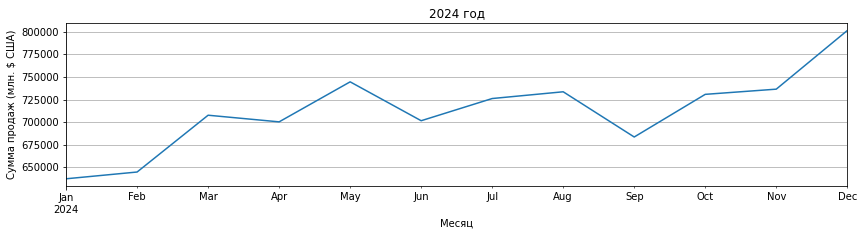

In [3]:
print('Сумма продаж в сфере розничной торговли и услуг общественного питания в США по годам')

for year in set(data.index.year):
    mask = data.index.year == year
    year_data = data[['val']].loc[mask]
    year_data.plot(
            figsize=(14, 3),
            title=f'{year} год',
            xlabel='Месяц',
            ylabel='Сумма продаж (млн. $ США)',
            grid=True,
            legend=False,
        );

Из общих тенденций можно выделить следующие моменты:
- есть годовая сезонность;
- продажи ниже в январе-феврале;
- в течение года наблюдается их рост;
- наибольшее количество продаж приходится на декабрь;
- в сентябре идет спад продаж по сравнению с августом.

Посмотрим, как распределено среднее по месяцам за все рассматриваемые годы.

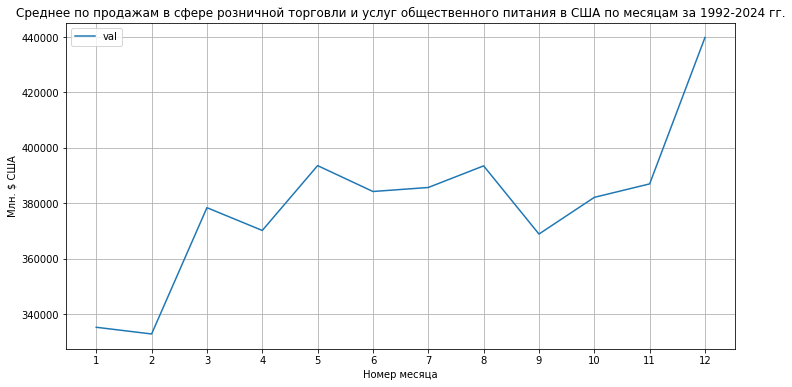

In [4]:
# Добавим признак с номером месяца
data['month'] = data.index.month

# Первые и последний годы, за которые представлены данные
year_start = data.index.year.min()
year_end = data.index.year.max()

data.groupby(by='month').mean().plot(
    figsize=(12, 6),
    title=f'Среднее по продажам в сфере розничной торговли и услуг общественного питания в США \
по месяцам за {year_start}-{year_end} гг.',
    ylabel='Млн. $ США',
    xlabel='Номер месяца',
    xticks=range(1,13),
    grid=True,
);

Здесь видны те же тенденции, что были отмечены выше.